          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

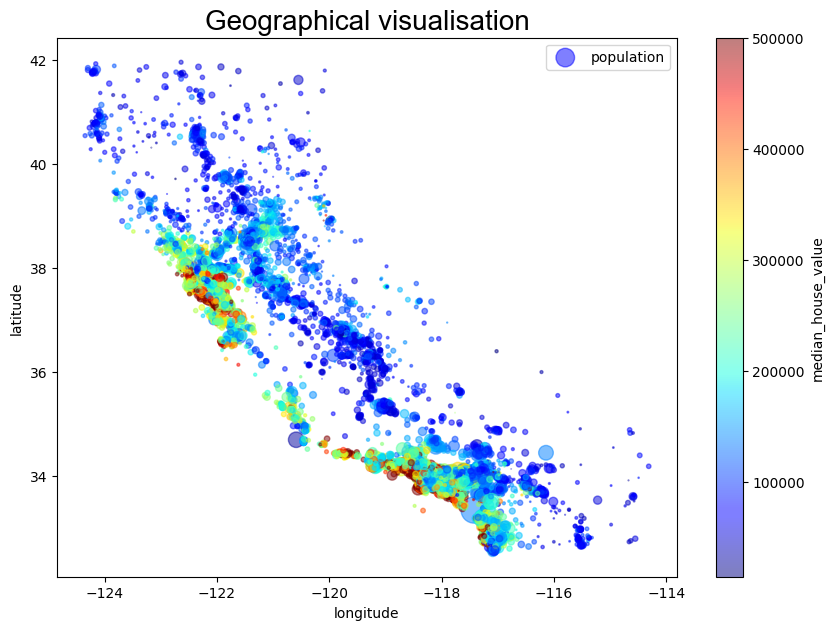

In [3]:
from mlproject import fetch_housing_data
from mlproject import load_housing_data
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("../datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

fetch_housing_data()
housing = load_housing_data()
print(housing.describe())
housing["income_cat"] = pd.cut(housing["median_income"], bins = [0,1.5,3.0,4.5,6, np.inf], labels = [1,2,3,4,5])
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#copie a datelor selectate ca antrenament
dataset_copy = strat_train_set.copy()
dataset_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5, s=dataset_copy["population"]/100, label="population", figsize = (10,7), c="median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)
plt.title("Geographical visualisation", fontsize=20, fontdict = {'fontname':'Arial'})
plt.legend()
plt.show()


In [9]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)
print("\nThe median of the total_bedrooms dataset is:", median)
total_bedrooms = housing["total_bedrooms"]
print("\nThe total_bedrooms dataset is:", total_bedrooms)
print("\nBasic statistics of the completed dataset: ")
print(total_bedrooms.describe())







The median of the total_bedrooms dataset is: 435.0

The total_bedrooms dataset is: 0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

Basic statistics of the completed dataset: 
count    20640.000000
mean       536.838857
std        419.391878
min          1.000000
25%        297.000000
50%        435.000000
75%        643.250000
max       6445.000000
Name: total_bedrooms, dtype: float64


In [5]:
 #Curatarea datelor => algoritmii de machine learning nu vor functiona bine cu date lipsa sau coloane goale
    #dataset.dropna(subset = ["total_bedrooms"]) #prima optiune - scoate valorile NaN
    #dataset.drop("total_bedrooms", axis=1) #a doua optiune - sterge coloana
    #median = dataset["total_bedrooms"].median()#a treia optiune - calculeaza mediana pentru a putea completa spatiile goale cu date care nu vor afecta simetria
    #dataset_cleaned = dataset.copy()
    #dataset["total_bedrooms"].fillna(median, inplace=True)

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

housing_cat = housing[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
#print(housing_cat_encoded[:100])

cat_encoder = OneHotEncoder()
housing_cat_onehot = cat_encoder.fit_transform(housing_cat)
array_onehot = housing_cat_onehot.toarray()
print(array_onehot)







[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
housing_num = housing.drop("ocean_proximity", axis = 1)
imputer.fit(housing_num)
list(housing_num)


['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'income_cat']

In [8]:
#testam corelatii
corr_matrix = housing.select_dtypes(include = [np.number]).corr()

print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

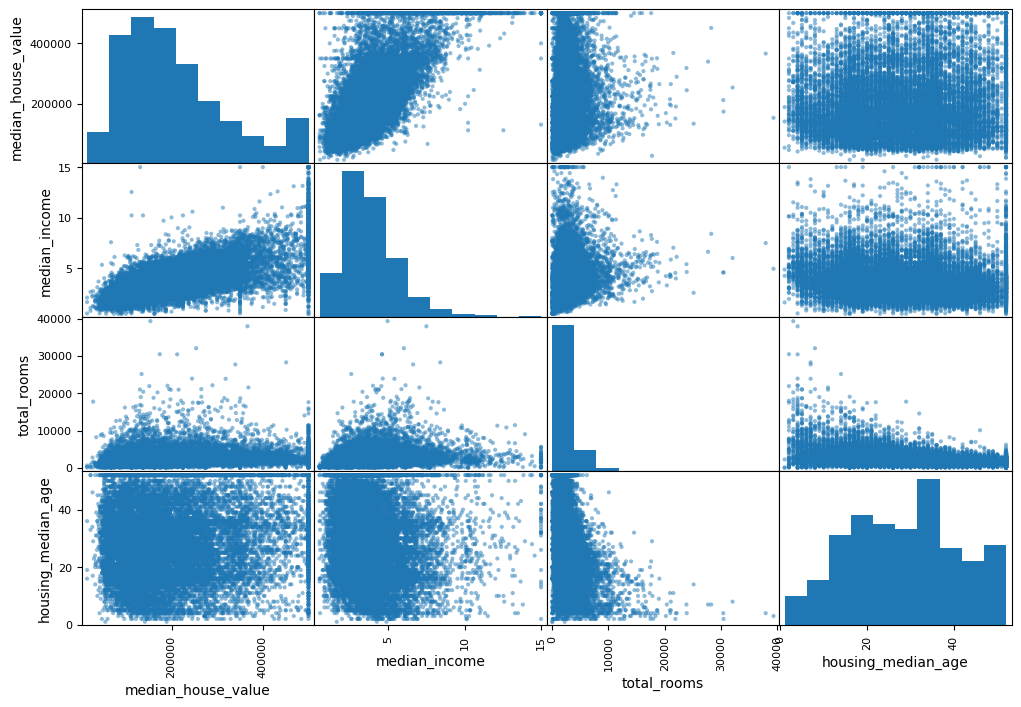

In [7]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(dataset_copy[attributes], figsize = (12,8))
plt.show

 #Exercitiu 1
    #Support Vector Machine Regressor

    svr_lin = SVR(kernel = 'linear')
    svr_rbf = SVR(kernel = 'rbf')
    svr_poly = SVR(kernel = 'poly')

    svr_lin.fit(housing_prepared, housing_labels)
    svr_rbf.fit(housing_prepared, housing_labels)
    svr_poly.fit(housing_prepared, housing_labels)

    strat_train_set['linear_svr_predicition'] = svr_lin.predict(housing_prepared)
    strat_train_set['rbf_svr_prediction'] = svr_rbf.predict(housing_prepared)
    strat_train_set['poly_svr_prediction'] = svr_poly.predict(housing_prepared)

    plt.figure(figsize=(14,12))
    plt.scatter(strat_train_set[''])